Let's have $y = w \cdot x  + b$. Application of the rules of differentiation is simple, e.g. 

$$\frac{\mathrm{d}y}{\mathrm{d}x} = w , \quad
\frac{\mathrm{d}y}{\mathrm{d}w} = x, \quad
\frac{\mathrm{d}y}{\mathrm{d}b} = 1$$

The change in $y$ is porportional to the change in $x$. The bigger is $w$, the bigger is the change of $y$ for the same change of $x$.

Let's $L = f(y) = f(y(x))$. Application of the chain rule is simple, e.g. 

$$\frac{\mathrm{d}L}{\mathrm{d}x} = \frac{\mathrm{d}f(y)}{\mathrm{d}y} \cdot \frac{\mathrm{d}y}{\mathrm{d}x} = \frac{\mathrm{d}L}{\mathrm{d}y} \cdot w$$ 
$$\frac{\mathrm{d}L}{\mathrm{d}w} = \frac{\mathrm{d}f(y)}{\mathrm{d}y} \cdot \frac{\mathrm{d}y}{\mathrm{d}w} = \frac{\mathrm{d}L}{\mathrm{d}y} \cdot x$$ 
$$\frac{\mathrm{d}L}{\mathrm{d}b} = \frac{\mathrm{d}f(y)}{\mathrm{d}y} \cdot \frac{\mathrm{d}y}{\mathrm{d}b} = \frac{\mathrm{d}L}{\mathrm{d}y} \cdot 1$$.

The multidimensional case is not so simple. Functions with multiple inputs and multiple outputs have multiple partial derivatives which need to be arranged and stored properly. Applying this for batches of data complicates the picture even more.

## Derivative of a transformation

The derivative of a function (transformation $\psi$) with multiple inputs $\mathbf{x} \in \mathbb{R}^M$ and multiple outputs $\mathbf{y} \in \mathbb{R}^H$ is a matrix containing the partial derivatives of each output with respect to each input (the so called Jacobian of the transformation, $\frac{\partial{\mathbf{y}}}{\partial{\mathbf{x}}} \in \mathbb{R}^{M \times H}$). For example, if $M=4$ and $H=2$ we can write:

$\mathbf{y} = \psi(\mathbf{x})$,

$\mathbf{x} = \begin{bmatrix} x_1 \\ x_2 \\ x_3 \\ x_4\end{bmatrix}, \quad
\mathbf{y} = \begin{bmatrix} y_1 \\ y_2 \end{bmatrix}$

$\frac{\partial{\mathbf{y}}}{\partial{\mathbf{x}}} = \begin{bmatrix} \frac{\partial{y_1}}{\partial{x_1}} & \frac{\partial{y_1}}{\partial{x_2}} & \frac{\partial{y_1}}{\partial{x_3}}  & \frac{\partial{y_1}}{\partial{x_4}}\\
\frac{\partial{y_2}}{\partial{x_1}} & \frac{\partial{y_2}}{\partial{x_2}} & \frac{\partial{y_2}}{\partial{x_3}} & \frac{\partial{y_2}}{\partial{x_4}}
\end{bmatrix}$

The derivative of $\mathbf{y = W \cdot x}$ with respect to $\mathbf{x}$ is $\mathbf{W}$, i.e. $\frac{∂y}{∂x} = W$. 

We should note that in neural networks the input and output features are arranged as raw vectors.

The derivative of $\mathbf{y = x \cdot W}$ with respect to $\mathbf{x}$ is $\mathbf{W^T}$, i.e. 

$$\frac{∂y}{∂x} = W^T$$

## The chain rule

Let's have $y = x \cdot W + b$ and $L = f(y)$

![Simple NN](../nn-mini.png)

The chain rule involves propagating the gradient of the loss layer after layer backward towards the inputs and parameters of interest. In our demonstration case in order to calculate the gradient of $L$ with respect to the input $x$ we need to have the gradient of $L$ with respect to the output $y$. 

The shapes of the gradient is the same as the shape of the corresponding variable (parameter)

**A gradient is attached to each variable and parameter of the model**, i.e.

$y.g = \frac{\partial{L}}{∂{y}}$

$x.g = \frac{\partial{L}}{∂{x}} = \frac{\partial{L}}{\partial{y}} \cdot \frac{\partial{y}}{\partial{x}} = y.g \cdot \frac{\partial{y}}{\partial{x}} = y.g \cdot W^T$

$b.g = \frac{\partial{L}}{∂{b}} = \frac{\partial{L}}{\partial{y}} \cdot \frac{\partial{y}}{\partial{b}} = y.g \cdot \frac{\partial{y}}{\partial{b}} = y.g$

$W.g = \frac{\partial{L}}{∂W} = ((\frac{\partial{L}}{\partial{y}})^T \cdot \frac{\partial{y}}{\partial{W}})^T = (y.g^T \cdot x)^T = x^T \cdot y.g$



Notes:

- $x$, $y$ and $b$ are row vectors.
- $W$ is a weight matrix with $m$ rows and $h$ columns; 
- $x$ includes the $m$ input features
- $b$ is a bias with $h$ elements; 
- $y$ has $h$ features (or nodes).
- $x$ and $y$ represent input and output features (variables, nodes in the NN). Adding additional dimension (multiple rows) could represent multiple data samples. Inputs and outputs could be replaced by matrices $X$ and $Y$ where the last dimension gives the features ($x$ and $y$ for the corresponding data point); 

![Output y calculation](../xW.png) 
![x.g calculation](../x.grad.png) ![W.g calculation](../W.grad.png)

## Implementation and testing with code

Above equations are implemented in function `lin_grad` and tested in the following code

In [1]:
def lin_grad(x, w, b, y):
    # y.g shoudl be available!
    b.g = y.g.sum(dim=0)#/y.shape[0]
    w.g = x.T @ y.g
    x.g = y.g @ w.T

In [2]:
import torch
from torch import tensor
from matplotlib import pyplot as plt
%matplotlib inline

In [3]:
# Generate test input and ouput data
N = 100 # Number of samples
M = 4 # Number of input features
H = 2 # Number of outputs
x = torch.rand((N, M))*10 - 5 # Input
k1, k2, k3, k4, k6, k7 = 1, 1.5, 2, 2.5, 3.0, -0.5
W_true = torch.tensor([[k1, k1],
                  [k2, k2],
                  [k3, k6],
                  [k4, k7]])
b_true = torch.tensor([0, -1])
y = x @ W_true + b_true # Output
W_true, y[:7]

(tensor([[ 1.0000,  1.0000],
         [ 1.5000,  1.5000],
         [ 2.0000,  3.0000],
         [ 2.5000, -0.5000]]),
 tensor([[ -7.5035,  -5.0367],
         [ -2.0727, -10.6609],
         [ -9.3386,   5.5125],
         [ -0.1804, -17.9969],
         [  5.1996,  -3.5898],
         [  5.1145,  -9.0352],
         [-17.2544, -15.2718]]))

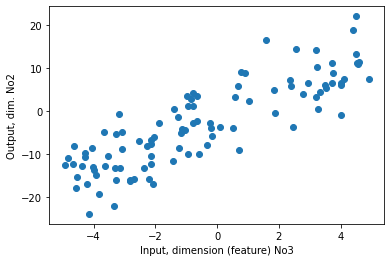

In [4]:
plt.scatter(x[:,2], y[:,1]);
plt.xlabel('Input, dimension (feature) No3');
plt.ylabel('Output, dim. No2');

In [5]:
# Generate random weights
w = torch.randn(M,H)
b = torch.zeros(H)
w, b

(tensor([[-0.9055, -0.2519],
         [ 0.7502,  1.0529],
         [-0.5820,  0.3151],
         [ 0.1611,  1.3592]]),
 tensor([0., 0.]))

In order to test the function `lin_grad` we need to calculate the gradient $∂L/dy$ and save it in `y_pred.g` (the gradient with respect to the prediction):

 - define model and calculate prediction
 - define and calculate loss $L$ as simple mean squared error `mse(y_pred, y_targ)`
 - define and run `mse_grad(y_pred, y_targ)`
 - run `lin_grad(x, w, b, y)`

In [6]:
def lin(x, w, b): return x @ w + b

In [7]:
y_pred = lin(x, w, b)
y_pred[:5]

tensor([[-6.4598, -7.6155],
        [ 7.1581,  4.5498],
        [-1.5218, -5.8842],
        [ 3.9179,  4.0623],
        [ 4.9901,  6.1729]])

In [8]:
def mse(y_pred, y_targ): return (y_pred-y_targ).pow(2).mean()

In [9]:
loss = mse(y_pred, y)
loss

tensor(120.5792)

In [10]:
def mse_grad(y_pred, y_targ): y_pred.g = 2 * (y_pred - y_targ) / y_targ.shape[0] / y_targ.shape[1]

In [11]:
mse_grad(y_pred, y)

Finnally, test if all dimensions in `lin_grad` match:

In [12]:
lin_grad(x, w, b, y_pred)

Next test if the loss improves

In [13]:
w -= 0.1 * w.g
b -= 0.1 * b.g
y_pred = lin(x, w, b)
loss = mse(y_pred, y)
loss

tensor(4.6226)

In [14]:
for i in range(20):
    y_pred = lin(x, w, b)
    loss = mse(y_pred, y)
    mse_grad(y_pred, y)
    lin_grad(x, w, b, y_pred)
    w -= 0.01 * w.g
    b -= 0.01 * b.g
    print(loss, end=', ')
print('End!\n')
print('Weights and biases of the network and for the dataset:')
w, b, W_true, b_true

tensor(4.6226), tensor(3.9730), tensor(3.4185), tensor(2.9449), tensor(2.5404), tensor(2.1948), tensor(1.8994), tensor(1.6469), tensor(1.4310), tensor(1.2463), tensor(1.0882), tensor(0.9528), tensor(0.8368), tensor(0.7374), tensor(0.6521), tensor(0.5788), tensor(0.5159), tensor(0.4618), tensor(0.4152), tensor(0.3750), End!

Weights and biases of the network and for the dataset:


(tensor([[ 0.8533,  0.9573],
         [ 1.4691,  1.4570],
         [ 1.8881,  2.9691],
         [ 2.4253, -0.5074]]),
 tensor([-0.1483, -0.4456]),
 tensor([[ 1.0000,  1.0000],
         [ 1.5000,  1.5000],
         [ 2.0000,  3.0000],
         [ 2.5000, -0.5000]]),
 tensor([ 0, -1]))

## PyTorch autograd and backpropagation

We will use PyTorch automatic gradient calculation to check our algorithms. This involves using the build-in methods and parameters `.backward()` and `.grad`.

In order to apply PyTorch backpropagation and autograd we need to define a `forward` function that relates the inputs with the loss:

In [15]:
def forward(x, y):
    y_pred = lin(x, w, b)
    loss =  mse(y_pred, y)
    return loss

In [16]:
loss = forward(x, y)
loss

tensor(0.3403)

But this is not enough: 

```
    loss.backward()
``` 
--> `RuntimeError: element 0 of tensors does not require grad and does not have a grad_fn`

Looks like a slot for saving the gradient to the corresponding inputs and model parameters should be required.

In [17]:
# Update gradients as above - manual backward - for comparison

# forward
y_pred = lin(x, w, b)
loss =  mse(y_pred, y)

# backward
mse_grad(y_pred, y)
lin_grad(x, w, b, y_pred)

# Good to know: the parameters are not updated in the backward pass!

In [18]:
# Require gradient to keep them with the data

for element in [x, w, b]:
    element.requires_grad_(True)

In [19]:
loss = forward(x, y)
loss.backward()

In [20]:
loss

tensor(0.3403, grad_fn=<MeanBackward0>)

In [21]:
from fastcore.test import test_close

In [22]:
test_close(x.g, x.grad)
test_close(w.g, w.grad)
test_close(b.g, b.grad)

## What is next?

The next step is to try to create a "proper" non-linear neural network.

The structure of a fully connected neural network with single hidden layer could be represented as follows:

![NN with one hidden layer](../nn.png)

A few more gradients need to be defined and calculated